<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">

## Modeling means of timeseries, autocorrelation and partial autocorrelation 

Week 9 | Lesson 2.1.2

---

We will be loading the Rossman store data to practice more timeseries plotting, look at different ways of modeling the mean (or median, etc.) of timeseries, and learn about the autocorrelation and partial autocorrelation.

The autocorrelation and partial autocorrelation are essential to understanding the ARIMA models we will cover tomorrow.

---

---

**Load the rossman store data, then convert the date to datetime format and make it the index of the DataFrame:**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#import prettyplotlib as ppl

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
data = pd.read_csv('../../assets/datasets/rossmann.csv', skipinitialspace=True)

In [6]:
data.columns = ['store','day_of_week','date','sales','customers','open','promo',
                'state_holiday','school_holiday']

In [7]:
data.head(6)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1


In [12]:
data.dtypes

store              int64
day_of_week        int64
date              object
sales              int64
customers          int64
open               int64
promo              int64
state_holiday     object
school_holiday     int64
dtype: object

---

**Plot a seaborn factorplot `kind='box'` for stores 1, 4, and 9 with the x-axis the day of the week and the y-axis the sales:**

In [13]:
stores = data[data.store.isin([1,4,9])]
stores.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,5,2015-07-31,5263,555,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
1118,4,4,2015-07-30,10387,1276,1,1,0,1


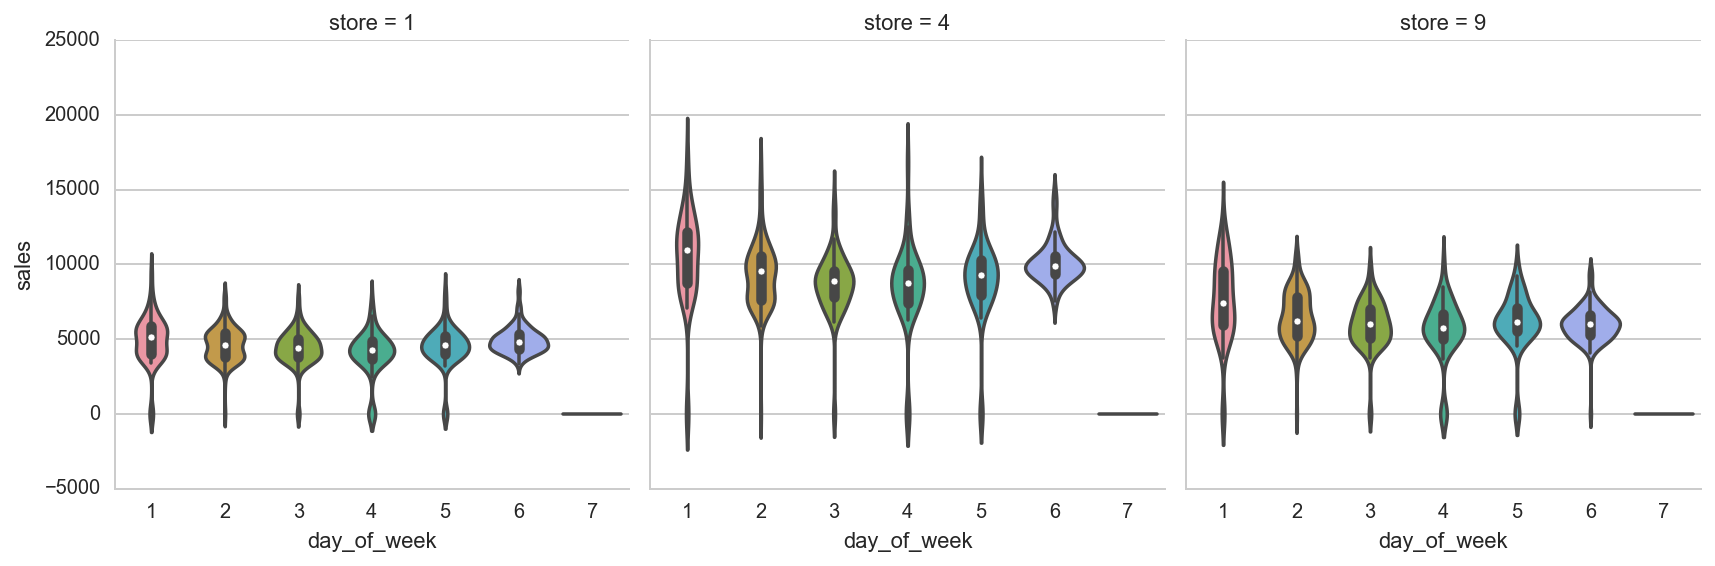

In [15]:
#fig = plt.figure(figsize=(16,7))
#ax = fig.gca()
sns.factorplot(x='day_of_week', y='sales', data=stores, kind='violin', col='store')

---

**Plot the sales and customer timeseries for store 1 when open:**

In [16]:
data.date = pd.to_datetime(data.date)

In [21]:
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
print data.month.unique()
print data.year.unique()

[ 7  6  5  4  3  2  1 12 11 10  9  8]
[2015 2014 2013]


In [22]:
store1_open = data[(data.store == 1) & (data.open == 1)]

In [23]:
store1_open_sorted = store1_open.sort_values(['date'], ascending=True)

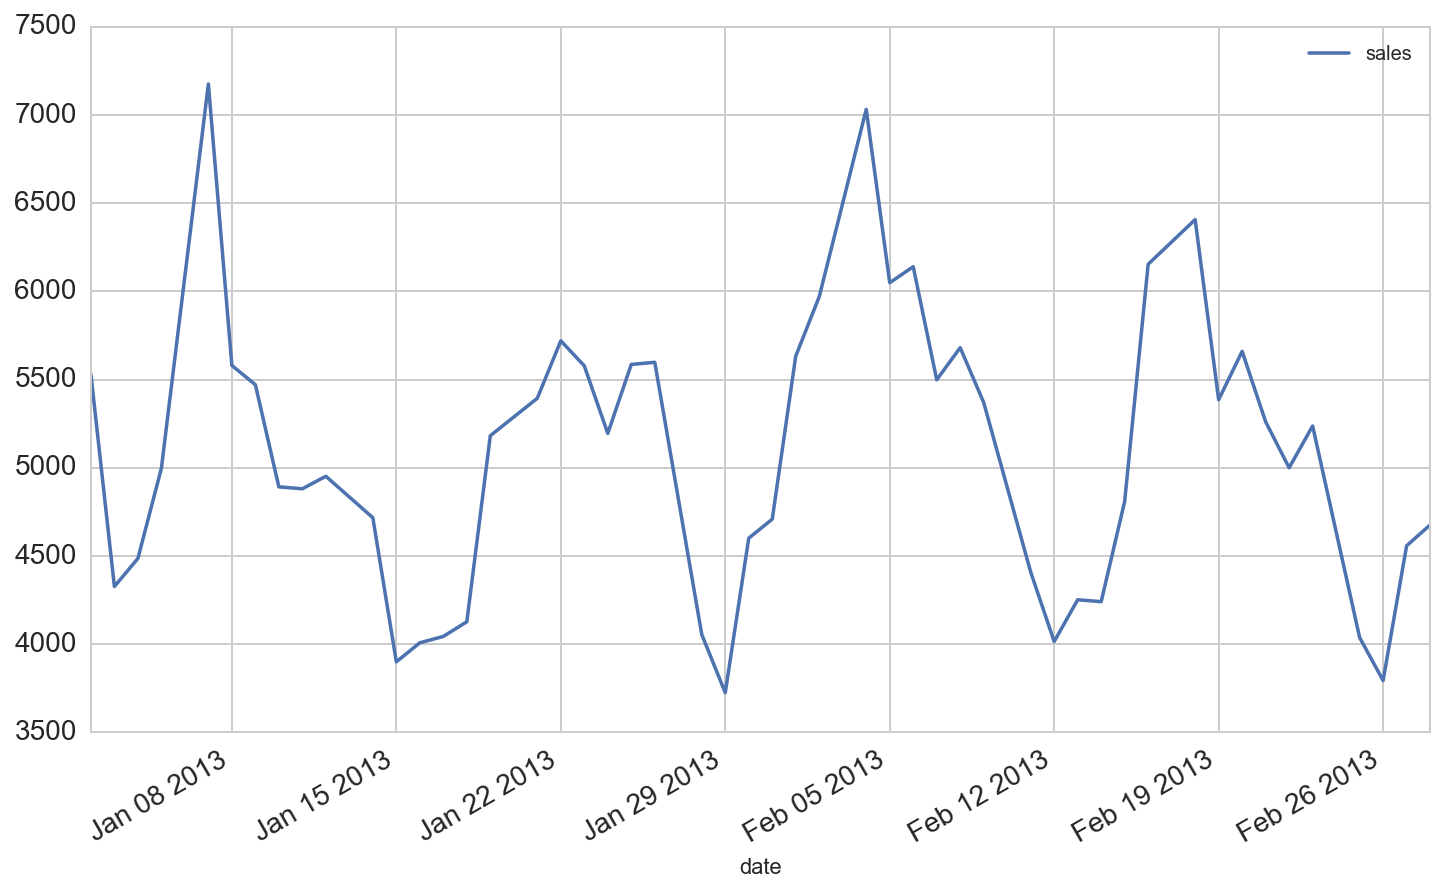

In [25]:
mask = store1_open_sorted.month.isin([1,2]) & (store1_open_sorted.year == 2013)
store1_open_sorted[mask].plot(x='date',y='sales', figsize=(12,7), fontsize=14)

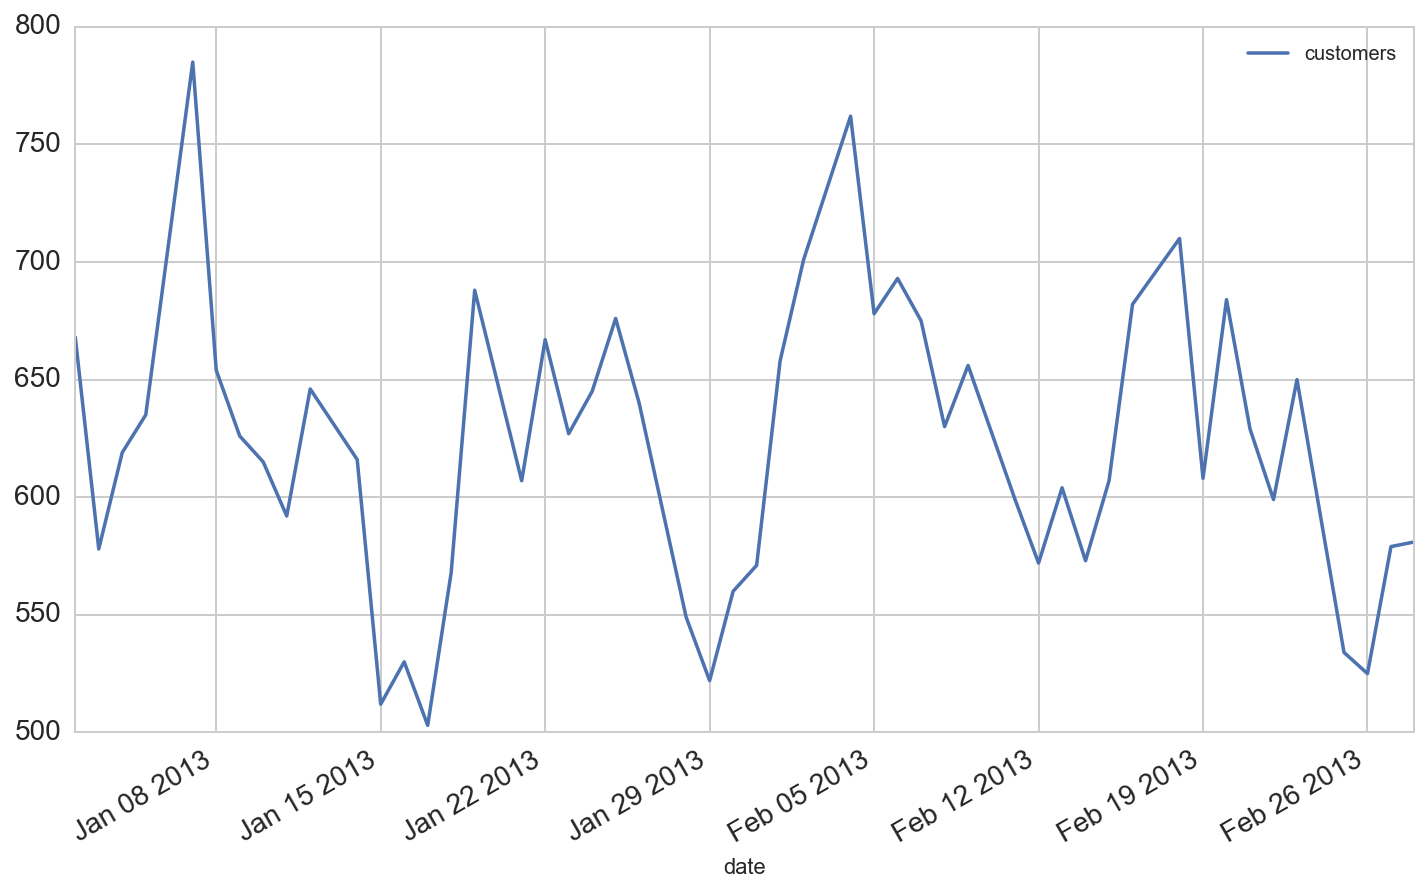

In [26]:
store1_open_sorted[mask].plot(x='date',y='customers', figsize=(12,7), fontsize=14)

In [31]:
store1_open_sorted['sales_per_cust'] = store1_open_sorted.sales/store1_open_sorted.customers

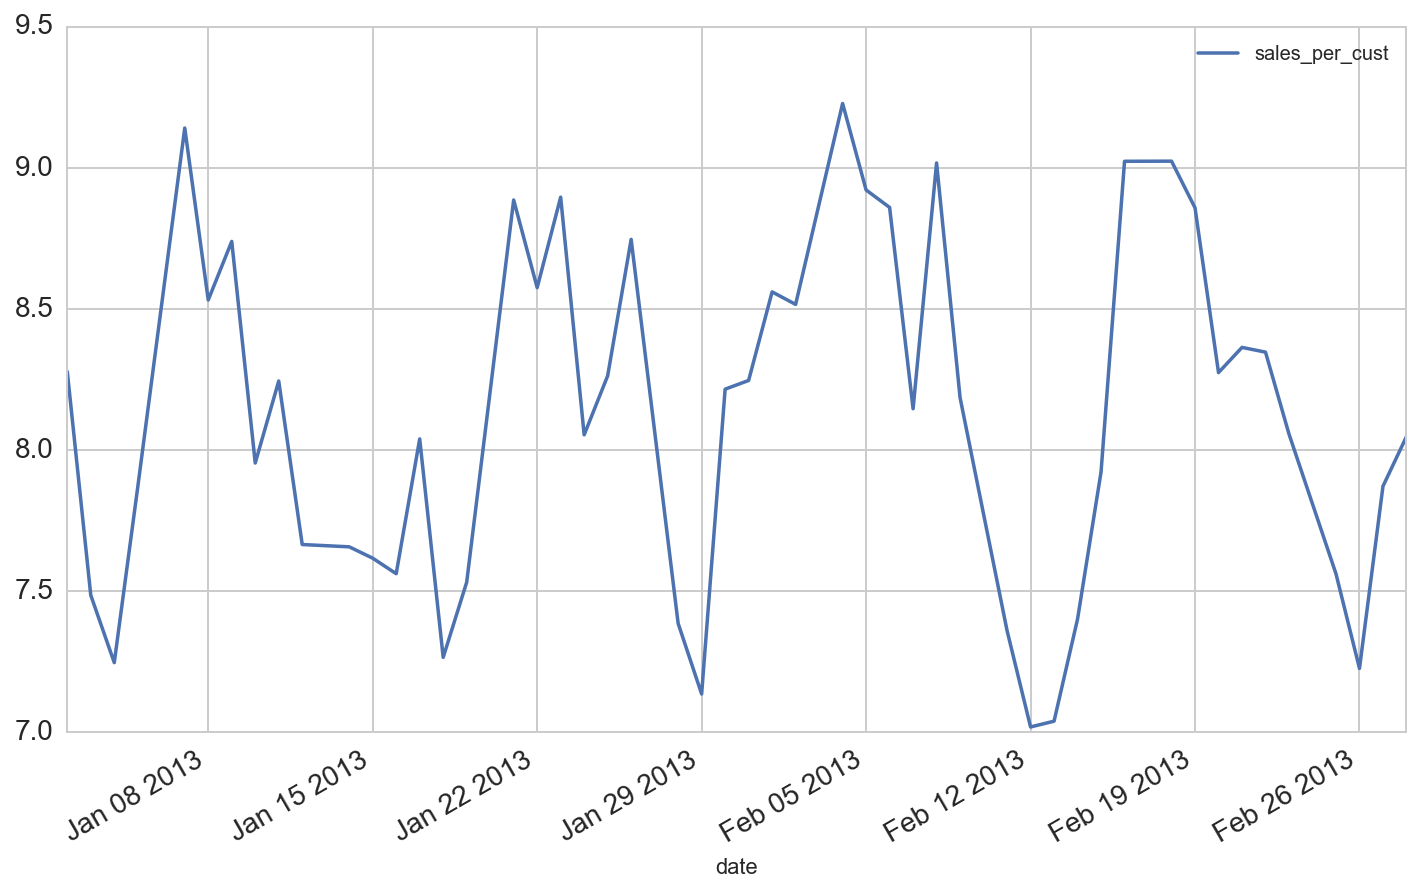

In [32]:
store1_open_sorted[mask].plot(x='date',y='sales_per_cust', figsize=(12,7), fontsize=14)

---

**Plot the customer timeseries for store 1 and 4 (when open):**

In [33]:
store4_open = data[(data.store == 4) & (data.open == 1)]
store4_open_sorted = store4_open.sort_values(['date'], ascending=True)

mask4 = store4_open_sorted.month.isin([1,2]) & (store4_open_sorted.year == 2013)

date_ticks1 = store1_open_sorted[mask].date.dt.to_pydatetime()
date_ticks4 = store4_open_sorted[mask4].date.dt.to_pydatetime()

In [34]:
print len(date_ticks1), len(date_ticks4)

50 50


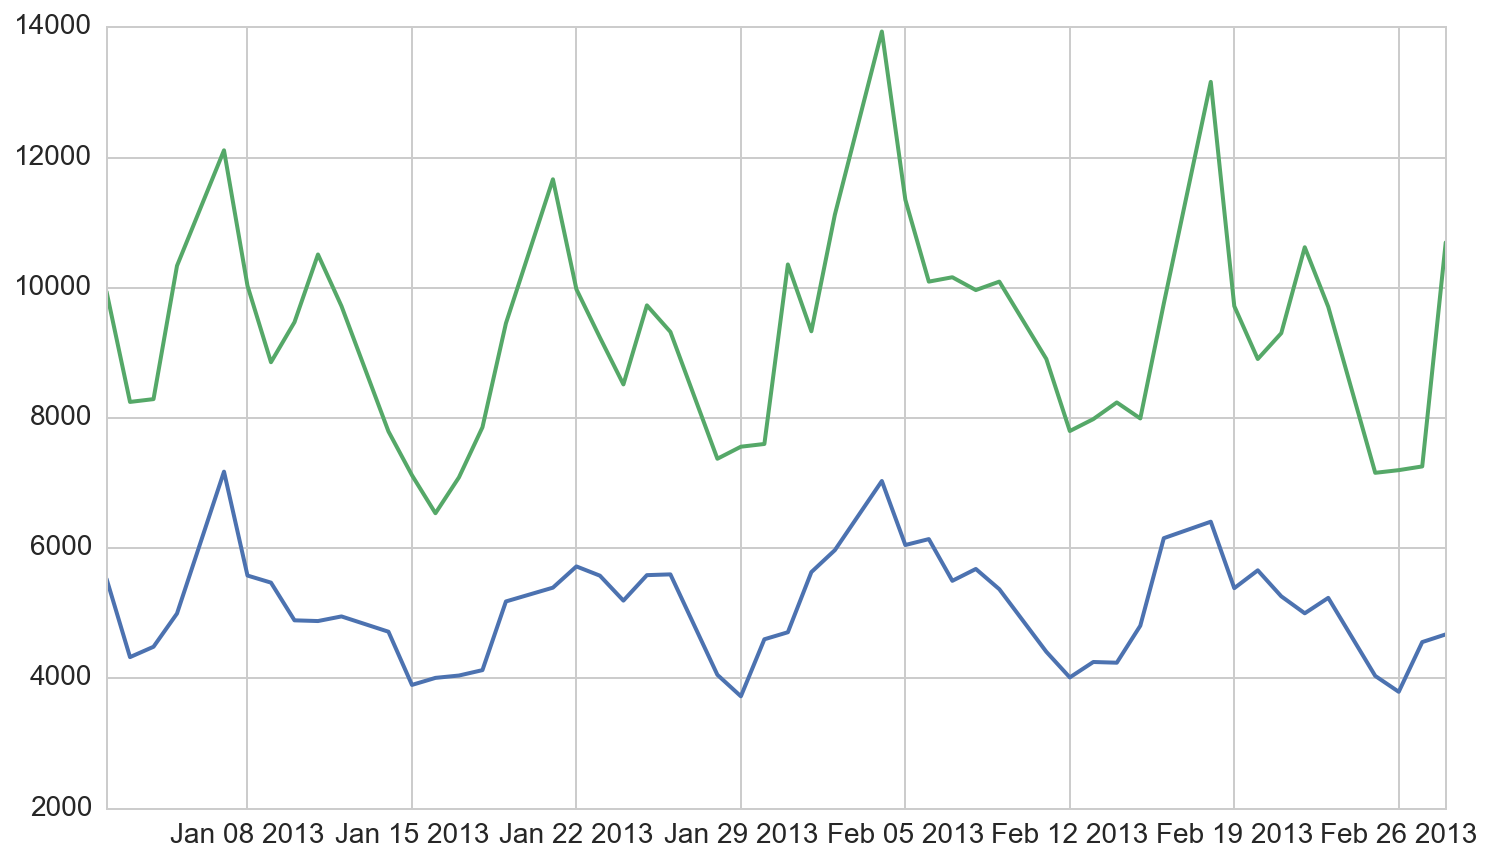

In [35]:
plt.figure(figsize=(12,7))

plt.plot(date_ticks1, store1_open_sorted[mask].sales, lw=2)
plt.plot(date_ticks4, store4_open_sorted[mask4].sales, lw=2)

plt.tick_params(labelsize=14)
plt.show()

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.resample.html

---

### Autocorrelation

The "autocorrelation" with a specified period and lag is the correlation between the current timepoint and the timepoint prior defined by the period (day, week, month, etc.) the specified lag prior.

---

**Calculate the autocorrelation for store 1 sales (when open) for day and week periods with lag 1:

In [37]:
s1 = data[data.store == 1]
s1_open = data[(data.store == 1) & (data.open == 1)]


In [38]:
s1.index = s1.date
s1_open.index = s1_open.date

In [39]:
s1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,month,year
date,,,,,,,,,,,
2015-07-31,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
2015-07-30,1,4,2015-07-30,5020,546,1,1,0,1,7,2015
2015-07-29,1,3,2015-07-29,4782,523,1,1,0,1,7,2015
2015-07-28,1,2,2015-07-28,5011,560,1,1,0,1,7,2015
2015-07-27,1,1,2015-07-27,6102,612,1,1,0,1,7,2015


In [40]:
s1.sort_index(ascending=True, inplace=True)
s1_open.sort_index(ascending=True, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
autocorr_day_lag1 = s1['sales'].resample('D').mean().autocorr(lag=1)
print autocorr_day_lag1

-0.127325143391


In [42]:
autocorr_day_open_lag1 = s1_open['sales'].resample('D').mean().autocorr(lag=1)
print autocorr_day_open_lag1

0.744897317238


In [46]:
day_7lags = [[i+1, s1['sales'].resample('D').mean().autocorr(lag=lag)] for i, lag in enumerate(range(1,8))]

In [47]:
for day, ac in day_7lags:
    print 'day:', day, 'autocor:', ac

day: 1 autocor: -0.127325143391
day: 2 autocor: -0.0347871557079
day: 3 autocor: 0.064736112913
day: 4 autocor: -0.00181144791099
day: 5 autocor: -0.109457935289
day: 6 autocor: -0.229639355765
day: 7 autocor: 0.630719243284


In [53]:
week_lags = [
    [i, s1['sales'].resample('W').median().autocorr(lag=i)]
    for i in [1,2,3,4,5,6]
]

for week, ac in week_lags:
    print 'week:', week, 'autocor:', ac
#autocorr_week_lag1 = s1['sales'].resample('W').sum().autocorr(lag=1)

#print autocorr_day_lag1
#print autocorr_week_lag1

week: 1 autocor: -0.267077617657
week: 2 autocor: 0.378182450808
week: 3 autocor: -0.148473672162
week: 4 autocor: 0.263161443276
week: 5 autocor: -0.032023468629
week: 6 autocor: 0.0374376116088


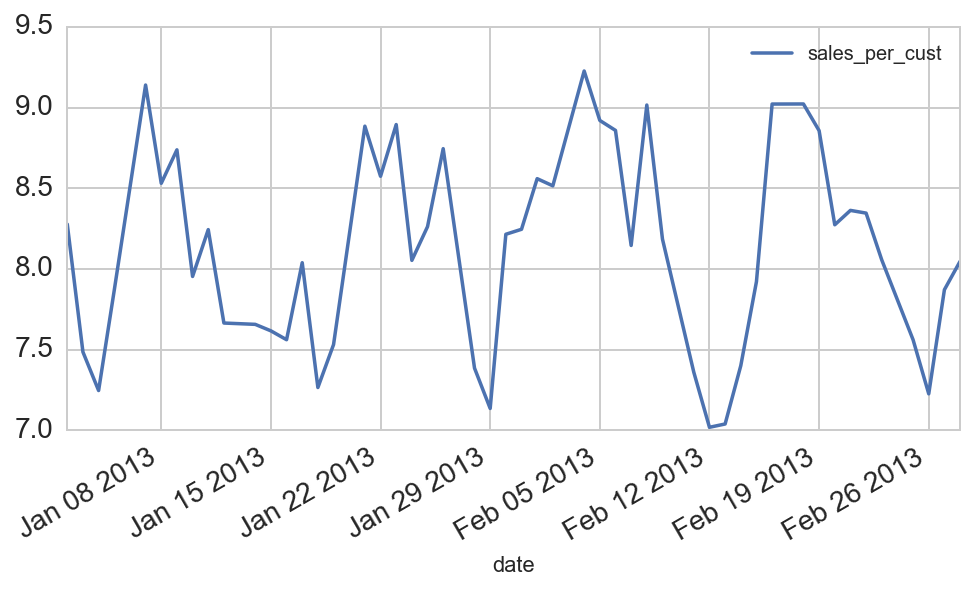

In [52]:
store1_open_sorted[mask].plot(x='date',y='sales_per_cust', figsize=(8,4), fontsize=14)

---

### Rolling mean and rolling median

The "rolling mean" or median takes a specified lag and uses the current time point and time points prior up to the specified lag to calculate the statistic.

---

**Calculate the monthly rolling mean and median for all sales. Plot the rolling mean for customers and sales with lag 15:**

---

**`rolling().mean()`** (as well as **`rolling().median()`**) takes these important parameters:

- the first is the series to aggregate
- **`window`** is the number of days to include in the average
- **`center`** is whether the window should be centered on the date or use data prior to that date
- **`freq`** is on what level to roll-up the averages to (as used in **`resample`**). Either **`D`** for day, **`M`** for month or **`A`** for year, etc.



---

**Calculate the weekly rolling mean of sales for store 1 in 2014, using a weekly time period with an order 2 window, and plot:**

In [57]:
store1_open_sorted.index = store1_open.date
store1_open.sort_index(ascending=True, inplace=True)

In [59]:
week_2wk_roll_mean = store1_open_sorted['sales'].resample('W').mean().rolling(window=2).mean()
week_2wk_roll_mean[0:10]

date
2013-01-06            NaN
2013-01-13    4589.750000
2013-01-20    4404.333333
2013-01-27    4302.083333
2013-02-03    4506.083333
2013-02-10    4459.250000
2013-02-17    4068.000000
2013-02-24    4202.583333
2013-03-03    4621.666667
2013-03-10    4800.000000
Freq: W-SUN, Name: sales, dtype: float64

In [62]:
store1_open_sorted.head(3)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,month,year,sales_div_cust,sales_per_cust
date,,,,,,,,,,,,,
2015-07-31,1,3,2013-01-02,5530,668,1,0,0,1,1,2013,8.278443,8.278443
2015-07-30,1,4,2013-01-03,4327,578,1,0,0,1,1,2013,7.486159,7.486159
2015-07-29,1,5,2013-01-04,4486,619,1,0,0,1,1,2013,7.247173,7.247173


In [66]:
week_2wk_roll_mean.index.to_pydatetime()

array([datetime.datetime(2013, 1, 6, 0, 0),
       datetime.datetime(2013, 1, 13, 0, 0),
       datetime.datetime(2013, 1, 20, 0, 0),
       datetime.datetime(2013, 1, 27, 0, 0),
       datetime.datetime(2013, 2, 3, 0, 0),
       datetime.datetime(2013, 2, 10, 0, 0),
       datetime.datetime(2013, 2, 17, 0, 0),
       datetime.datetime(2013, 2, 24, 0, 0),
       datetime.datetime(2013, 3, 3, 0, 0),
       datetime.datetime(2013, 3, 10, 0, 0),
       datetime.datetime(2013, 3, 17, 0, 0),
       datetime.datetime(2013, 3, 24, 0, 0),
       datetime.datetime(2013, 3, 31, 0, 0),
       datetime.datetime(2013, 4, 7, 0, 0),
       datetime.datetime(2013, 4, 14, 0, 0),
       datetime.datetime(2013, 4, 21, 0, 0),
       datetime.datetime(2013, 4, 28, 0, 0),
       datetime.datetime(2013, 5, 5, 0, 0),
       datetime.datetime(2013, 5, 12, 0, 0),
       datetime.datetime(2013, 5, 19, 0, 0),
       datetime.datetime(2013, 5, 26, 0, 0),
       datetime.datetime(2013, 6, 2, 0, 0),
       datetime.

In [75]:
#plt.figure(figsize=(10,6))

store1_open_sorted.sort_index(ascending=True, inplace=True)

orig_dates = store1_open_sorted.index.to_pydatetime()
roll_dates = week_2wk_roll_mean.index.to_pydatetime()


In [76]:
print orig_dates[0:5]
print roll_dates[0:5]

[datetime.datetime(2013, 1, 2, 0, 0) datetime.datetime(2013, 1, 3, 0, 0)
 datetime.datetime(2013, 1, 4, 0, 0) datetime.datetime(2013, 1, 5, 0, 0)
 datetime.datetime(2013, 1, 7, 0, 0)]
[datetime.datetime(2013, 1, 6, 0, 0) datetime.datetime(2013, 1, 13, 0, 0)
 datetime.datetime(2013, 1, 20, 0, 0) datetime.datetime(2013, 1, 27, 0, 0)
 datetime.datetime(2013, 2, 3, 0, 0)]


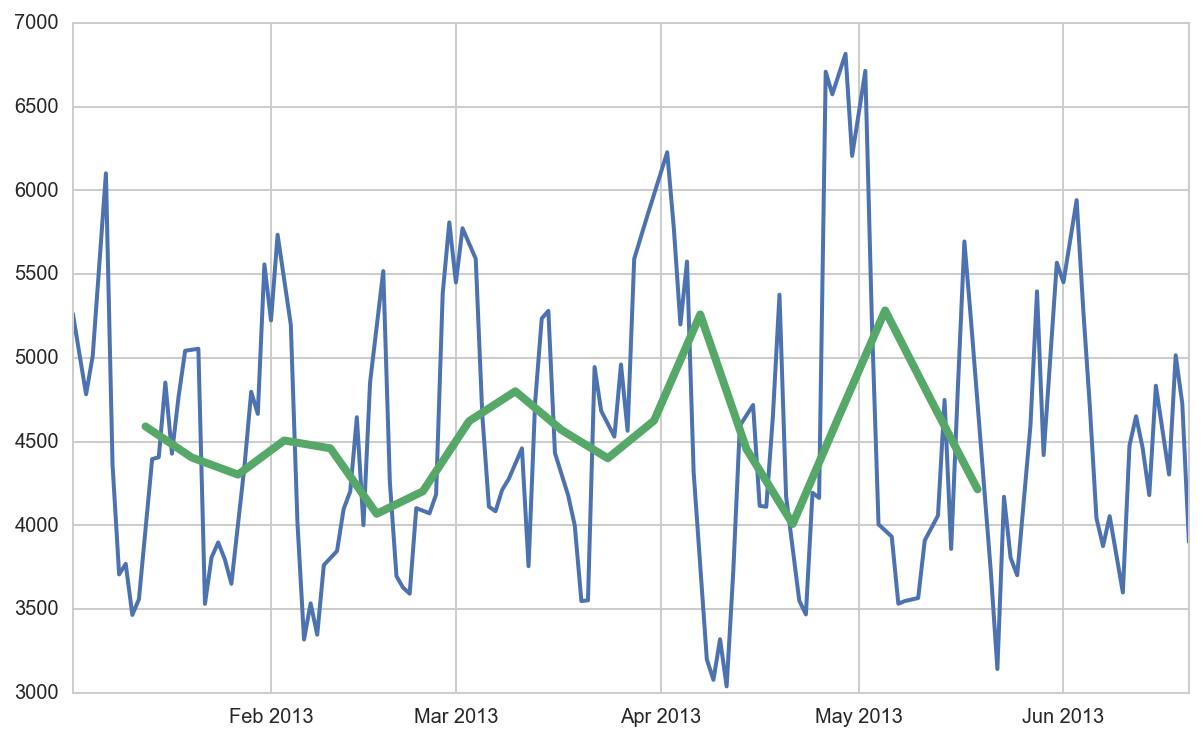

In [79]:
plt.figure(figsize=(10,6))

plt.plot(orig_dates[0:140], store1_open_sorted.sales[:140], lw=2)
plt.plot(roll_dates[1:20], week_2wk_roll_mean.values[1:20], lw=4)

plt.show()

---

### Expanding mean vs rolling mean

The "expanding mean" simply uses all datapoints up to the current time to calculate the mean.

---

**Plot the rolling mean and the expanded mean for store 1 sales in year 2014:**

---

### Exponentially weighted windows

http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows

---

Exponentially weighted windows are one of the most common and effective ways of modeling timeseries data. There is an "exponential decay" on the contribution of prior means, making each subsequent previous mean have less of a contribution to the currently modeled mean.

The (adjusted) exponentially weighted mean for time $t$ is defined as:

### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$


---

**Plot the rolling, expanded, and exponentially weighted mean of sales data, as well as the actual sales, for the winter months of store 1 sales in 2014:**

---

### Pandas.diff() function

Another common function is is **`.diff()`**, which takes the difference over time. **`df.diff()`** takes one arugment, `periods`, which is how many prior rows to use for the difference.

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.diff.html

---

** Calculate the order 1 and order 2 differences for store 1 sales:**

---

## Autocorrelation revisited: acf and pacf

http://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm

http://www.ltrr.arizona.edu/~dmeko/notes_3.pdf

https://onlinecourses.science.psu.edu/stat510/node/62


---

### Autocorrelation and the autocorrelation function (acf)

Autocorrelation, also known as *serial correlation* and *lagged correlation*, is the correlation of a time series with iteself at different lags.

Examples of autocorrelation:

    In stock market data the stock price at one point is correlated with the stock 
    price of the point directly prior in time. 
    
    In sales data (like we have seen), sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days to more
    or less extent.
    
Autocorrelation in data is something that breaks the assumptions of linear regression, which is why using regression on time series data is typically inappropriate.

Below is the formula for the autocorrelation funtion (acf):

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ at time points } t_1, t_2, t_3 ... t_n:$

### $$lag_k\;acf() = \frac{\sum_{i=1}^{n-k}\left(\left(\;x_i - \bar{x}\;\right)\left(\;x_{i+k} - \bar{x}\;\right)\right)}{\sum_{i=1}^n\left(\;x_i - \bar{x}\;\right)^2}$$

Compare this to the formula for correlation:

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ aand measurements } y_1, y_2, y_3 ... y_n:$

### $$r_{xy} = \frac{\sum_{i=1}^{n-k}\left(\left(\;x_i - \bar{x}\;\right)\left(\;y_{i} - \bar{y}\;\right)\right)}{\sqrt{\left(\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)^2\sum_{i=1}^n\left(\;y_i - \bar{y}\;\right)^2\right)}}$$

---

**Calculate the autocorrelation for store 1:**

---

**Plot the autocorrelation for store 1:**

---

**Calculate and plot the autocorrelation for store 1 only for days when it is open:**

---

### Partial autocorrelation and partial autocorrelation function (pacf)

The partial autocorrelation function (pacf) is similar to the acf; the difference is that the correlations between other lagged timepoints are "regressed out" of the correlation for a given lag. Put another way, this is a *conditional correlation*.

An intuitive way to think about this is in the context of regression. For a pacf with lag = 2 take two regressions:

### $$lm_{t-1} = x_{t} \sim \beta_0 + \beta_1x_{t-1}$$

### $$lm_{t-2} = x_{t} \sim \beta_0 + \beta_1x_{t-1} + \beta_2x_{t-2}$$

Then to find the $pacf(\;x_{t-2}\;)$ we correlate the residuals of the models:

### $$ pacf(\;x_{t-2}\;) = cor\left(resid\left(lm_{t-1}\right), \;resid\left(lm_{t-2}\right)\right)$$

More formally, the $pacf$ is defined as:

### $$ pacf \left( x_{t-n} \right) = \frac{covariance \left( x_{t}, \; x_{t-n} \; | \; x_{t-1} ... x_{t-n-1} \right)} {\sqrt {\;  variance \left( x_{t} \ ;| \; x_{t-1} ... x_{t-n-1} \right) variance \left( x_{t-n} \; | \; x_{t-1} ... x_{t-n-1} \right) \; } }$$

---

We will load and use the $pacf()$ and $acf()$ functions from statsmodels as well as their plotting functions:

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

---

** Calculate and plot the partial autocorrelation and the autocorrelation again using the statsmodels functions:**